In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
games_df = pd.read_csv('games.zip',sep=';',compression = 'zip')
games_df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,White_Elo,Black_Elo,Result,Opening,Variation,Time_Control,Increment,Evaluation,Players_Clock,Termination,Moves
0,0,0,0,0,1791,1829,1-0,Queen's Gambit Refused,Marshall Defense,180.0,2.0,"['0.25', '0.25', '0.26', '0.78', '-0.08', '0.4...","['0:03:00', '0:03:00', '0:03:01', '0:03:02', '...",Resignation,1.d4 d5 2.c4 Nf6 3.Nc3 c6 4.Bg5 e6 5.f3 Be7 6....
1,1,1,1,1,2120,2104,1-0,Sicilian Defense,"Smith-Morra Gambit Accepted, Paulsen Formation",300.0,0.0,"['0.24', '0.2', '0.21', '0.47', '0.22', '0.09'...","['0:05:00', '0:05:00', '0:04:59', '0:04:59', '...",Checkmate,1.e4 c5 2.Nf3 e6 3.d4 cxd4 4.c3 dxc3 5.Nxc3 Nc...
2,2,2,2,2,1457,1521,1-0,Sicilian Defense,Old Sicilian,600.0,0.0,"['0.24', '0.2', '0.21', '0.08', '0.0', '0.0', ...","['0:10:00', '0:10:00', '0:09:59', '0:09:59', '...",Checkmate,1.e4 c5 2.Nf3 Nc6 3.Bc4 e6 4.d4 a6 5.dxc5 d5 6...
3,3,3,3,3,2296,2303,1-0,Queen's Pawn Game,London System,600.0,0.0,"['0.25', '0.22', '0.0', '0.0', '0.0', '0.0', '...","['0:10:00', '0:10:00', '0:09:58', '0:09:57', '...",Resignation,1.d4 Nf6 2.Bf4 d5 3.Nf3 c5 4.e3 Nc6 5.Nbd2 e6 ...
4,4,4,4,4,1547,1560,0-1,Queen's Pawn Game,Mason Attack,600.0,0.0,"['0.25', '0.25', '0.0', '0.37', '0.41', '0.54'...","['0:10:00', '0:10:00', '0:09:58', '0:09:56', '...",Resignation,1.d4 d5 2.Bf4 Nc6 3.e3 Nf6 4.Nf3 a6 5.c3 Bf5 6...


In [3]:
#Removing the two first columns originated from poor saving to csv
games_df.drop(games_df.columns[[0,1]],axis = 1,inplace=True)
games_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44199 entries, 0 to 44198
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1.1    44199 non-null  int64  
 1   Unnamed: 0.1.1.1  44199 non-null  int64  
 2   White_Elo         44199 non-null  int64  
 3   Black_Elo         44199 non-null  int64  
 4   Result            44199 non-null  object 
 5   Opening           44199 non-null  object 
 6   Variation         29336 non-null  object 
 7   Time_Control      44059 non-null  float64
 8   Increment         44059 non-null  float64
 9   Evaluation        44199 non-null  object 
 10  Players_Clock     44199 non-null  object 
 11  Termination       44199 non-null  object 
 12  Moves             44199 non-null  object 
dtypes: float64(2), int64(4), object(7)
memory usage: 4.4+ MB


About 15k of Variation is missing and we have some time control with increment also missing

<AxesSubplot:>

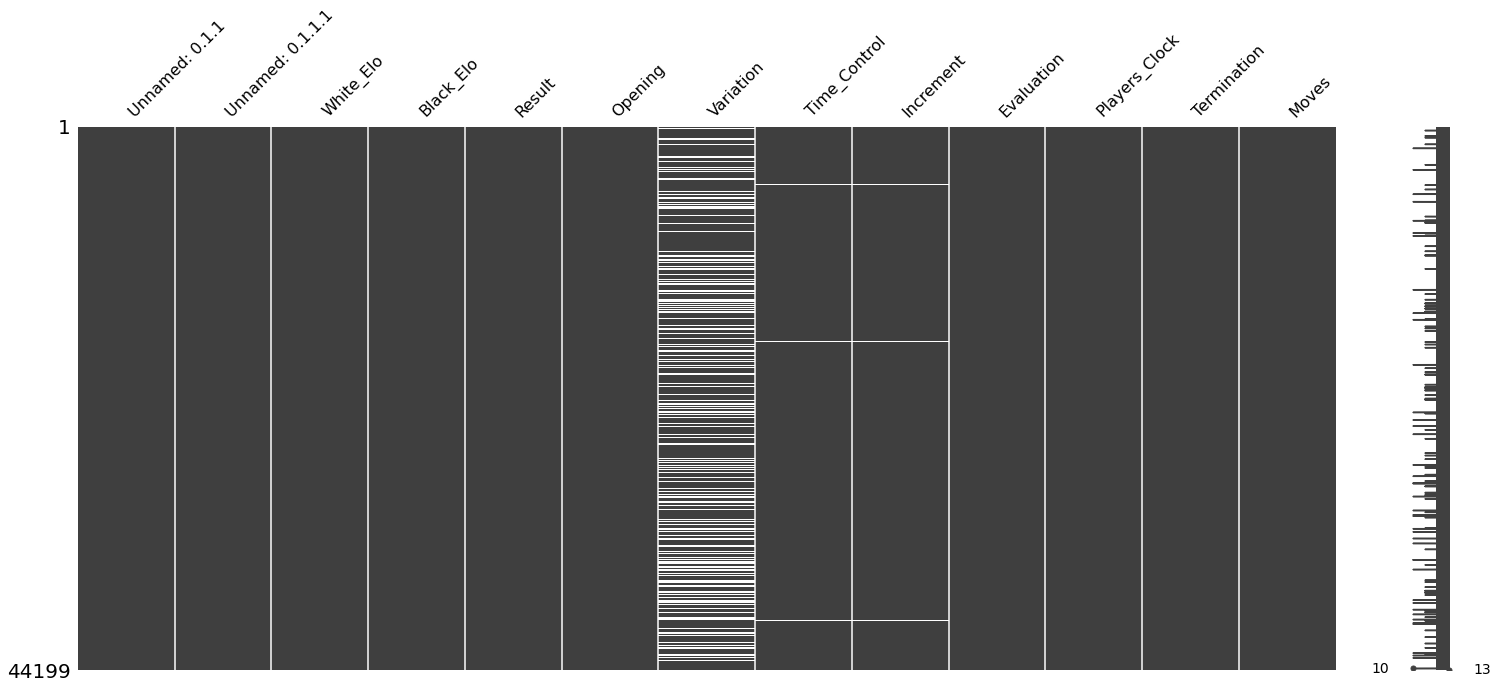

In [4]:
import missingno as msno
msno.matrix(games_df)

<AxesSubplot:>

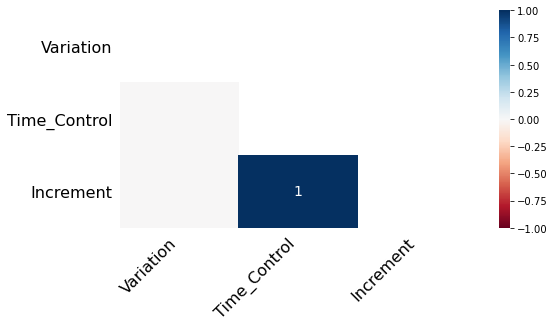

In [5]:

msno.heatmap(games_df,figsize=(8,4))

Time_control and Variation have a perfect correlation, I'll be removing all of them as is just a small part of the data. The varaiation missing is becuase they played the classical/mainlaine variation or a unknow variation,for these we are going to simply put a empty space string

In [6]:
games_df['Variation'].fillna('',inplace = True)
games_df.dropna(inplace=True)
games_df.reset_index(drop=True,inplace=True)
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44059 entries, 0 to 44058
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1.1    44059 non-null  int64  
 1   Unnamed: 0.1.1.1  44059 non-null  int64  
 2   White_Elo         44059 non-null  int64  
 3   Black_Elo         44059 non-null  int64  
 4   Result            44059 non-null  object 
 5   Opening           44059 non-null  object 
 6   Variation         44059 non-null  object 
 7   Time_Control      44059 non-null  float64
 8   Increment         44059 non-null  float64
 9   Evaluation        44059 non-null  object 
 10  Players_Clock     44059 non-null  object 
 11  Termination       44059 non-null  object 
 12  Moves             44059 non-null  object 
dtypes: float64(2), int64(4), object(7)
memory usage: 4.4+ MB


In [7]:
games_df.describe()

,Unnamed: 0.1.1,Unnamed: 0.1.1.1,White_Elo,Black_Elo,Time_Control,Increment
count,44059.000000,44059.000000,44059.000000,44059.000000,44059.000000,44059.000000
mean,22091.921469,22091.921469,1591.501850,1591.950861,382.883179,2.585306
std,12760.417307,12760.417307,337.093955,336.413808,346.497234,5.205767
min,0.000000,0.000000,600.000000,600.000000,0.000000,0.000000
25%,11040.500000,11040.500000,1344.000000,1343.000000,180.000000,0.000000
50%,22091.000000,22091.000000,1581.000000,1583.000000,300.000000,0.000000
75%,33143.500000,33143.500000,1825.000000,1826.000000,600.000000,2.000000
max,44198.000000,44198.000000,2882.000000,2882.000000,10800.000000,180.000000


Time control has a min value of 0, which doesn't make sense for a match to have 0 minutes, all other variables seems fine

In [8]:
games_df[games_df['Time_Control']==0].head()

,Unnamed: 0.1.1,Unnamed: 0.1.1.1,White_Elo,Black_Elo,Result,Opening,Variation,Time_Control,Increment,Evaluation,Players_Clock,Termination,Moves
1457,1461,1461,2425,2312,1-0,Queen's Pawn Game,Zukertort Variation,0.0,1.0,"['0.06', '0.25', '0.0', '0.35', '0.09', '0.23'...","['0:00:03', '0:00:03', '0:00:03', '0:00:03', '...",Time forfeit,1.Nf3 d5 2.d4 c6 3.Bg5 h6 4.Bh4 g5 5.Bg3 Bg7 6...
1705,1709,1709,1390,1363,0-1,Ponziani Opening,Jaenisch Counterattack,0.0,10.0,"['0.24', '0.37', '0.26', '0.15', '-0.09', '0.0...","['0:00:10', '0:00:10', '0:00:19', '0:00:20', '...",Checkmate,1.e4 e5 2.Nf3 Nc6 3.c3 Nf6 4.Bd3 Bc5 5.O-O d6 ...
2715,2720,2720,1803,1388,1-0,Scandinavian Defense,Mieses-Kotroc Variation,0.0,3.0,"['0.24', '0.53', '0.45', '0.71', '0.44', '0.72...","['0:00:03', '0:00:03', '0:00:05', '0:00:05', '...",Checkmate,1.e4 d5 2.exd5 Qxd5 3.Nf3 Qe6+ 4.Be2 Qe5 5.d4 ...
2836,2841,2841,1835,1333,1-0,Caro-Kann Defense,"Accelerated Panov Attack, Modern Variation",0.0,2.0,"['0.24', '0.23', '0.15', '-0.07', '0.0', '0.28...","['0:00:03', '0:00:03', '0:00:04', '0:00:04', '...",Checkmate,1.e4 c6 2.c4 d5 3.cxd5 cxd5 4.exd5 Nf6 5.Nc3 N...
2920,2925,2925,1805,1386,1-0,French Defense,,0.0,3.0,"['0.24', '0.3', '-0.24', '0.23', '-1.02', '-0....","['0:00:03', '0:00:03', '0:00:05', '0:00:06', '...",Resignation,1.e4 e6 2.Bc4 Be7 3.f4 c6 4.Nf3 a6 5.O-O b5 6....


Let's take a look at players clock in some of theses games

In [9]:
games_df.Players_Clock[games_df['Time_Control']==0].head()

1457    ['0:00:03', '0:00:03', '0:00:03', '0:00:03', '...
1705    ['0:00:10', '0:00:10', '0:00:19', '0:00:20', '...
2715    ['0:00:03', '0:00:03', '0:00:05', '0:00:05', '...
2836    ['0:00:03', '0:00:03', '0:00:04', '0:00:04', '...
2920    ['0:00:03', '0:00:03', '0:00:05', '0:00:06', '...
Name: Players_Clock, dtype: object

These matches appear to start with seconds for each player, I  created a custom mathc at lichess with starting time of 0 and 8 second of increment and looked at the pgn of the match, the time control was O, so that's explain why. Later it might be interesting to compare the data of this games with the data. <br>
<br>
Now let's take a look at number of moves of each game

In [10]:
games_df['N_Moves'] = games_df['Moves'].apply(lambda row: len(row.split(' ')[::2]))
games_df['N_Moves'].describe()
    

count    44059.000000
mean        31.812978
std         13.206657
min          3.000000
25%         23.000000
50%         29.000000
75%         38.000000
max        160.000000
Name: N_Moves, dtype: float64

In [11]:
games_df['Opening'].value_counts()

Sicilian Defense                                             5747
Queen's Pawn Game                                            3113
French Defense                                               2777
Scandinavian Defense                                         1969
Italian Game                                                 1806
                                                             ... 
Evans Gambit, Leonhardt Countergambit                           1
King's Gambit Accepted, Gianutio Countergambit                  1
Evans Gambit, Laroche Variation                                 1
Evans Gambit, Mieses Defense                                    1
Blackmar-Diemer Gambit Declined, Brombacher Countergambit       1
Name: Opening, Length: 236, dtype: int64

Sicilian Defense is the most played opening in the dataset, followed by the Queen' Pawn Game. We can also see that some opening still have their variaton(i.e: Evans Gambit, McDonnell Defense, Main Line), meaning that we were unnable to catch those in previous cleaning

In [12]:
openings = games_df['Opening'].to_numpy()
for i,opn in enumerate(openings):
    match= re.search(r'.+,(.+)',opn)
    if match:
        opening=match.group(0)
        variation = match.group(1)
        games_df.at[i,'Opening'] = opening
        games_df.at[i,'Variation'] = variation
games_df['Opening'].value_counts()  

Sicilian Defense                                             5747
Queen's Pawn Game                                            3113
French Defense                                               2777
Scandinavian Defense                                         1969
Italian Game                                                 1806
                                                             ... 
Evans Gambit, Leonhardt Countergambit                           1
King's Gambit Accepted, Gianutio Countergambit                  1
Evans Gambit, Laroche Variation                                 1
Evans Gambit, Mieses Defense                                    1
Blackmar-Diemer Gambit Declined, Brombacher Countergambit       1
Name: Opening, Length: 236, dtype: int64

Let's see if that makes a difference in the variation that were missing. Remember that we had 15173 missing variations

In [13]:
len(games_df.Variation[games_df['Variation']==''])

13969

In [14]:
games_df['Result'].value_counts()

1-0    22102
0-1    20718
2-1     1204
0-0        6
1-1        5
9-2        3
2-2        3
1-2        2
7-1        2
6-9        2
0-2        2
0-4        1
5-2        1
8-9        1
9-9        1
3-2        1
8-4        1
1-4        1
5-9        1
7-0        1
6-0        1
Name: Result, dtype: int64

Three unexpected things in the result data, first the lack of scores with 0.5 or 1/2(the ammount awarded for a draw),the scores that imply more than one game, and the 0-0 scores. The secong is probably because the pgn gets the result of the match rather than that of the single game(a match being multiple games played in a row by the same players), the 0-0 score I have no idea.

The first one, the lack of draw scores worries me, I expected to have fewer number of draws, those familiar with chess know that draws are more common among higher rated players which are smaller number of the population(we will se if thats true for these games) and rare in lower ratings. But to have zero is an anomaly. 

I believe three things might explain these, the first one is my method for choosing games in the database, I chose games that were one of the players requested a computer analysis after the match to study it, and you usually analise games that you've lost, so these would make draws ene less common, another one is that draws migh be hidden in the multiple games match, if in the match players tied twice you would have a whole number, but it's unlikely that all draws are only in matches and not in single games,a third factor could be the way lichess store it games, if the billions of games in the database are store in a way where decisive result(wins) come before draws, due to teh fact that i only parsed through a small fraction of games, I would not have gathered draws. 

Thats unfotunate as I belived draws would be a important predictor, due to the discrepancy between its occurance among lower and higher rated players

In [15]:
#I'm just goin to drop the matches results as they represent a small part of the data (less than 3%)
matches= games_df[(games_df['Result'] != '1-0') & (games_df['Result']!='0-1')].index
games_df =games_df.drop(index=matches)
games_df.reset_index(drop=True,inplace=True)


Our player clock is in string format but we are going to need it in a time format for calculations. But before converting it to datetime we need to separate each players clock

In [16]:
import ast
from datetime import datetime
clocks =games_df['Players_Clock']
w_clocks,w_clocks_dt,b_clocks,b_clocks_dt=([] for i in range(4))
for clock in clocks:
        clock=ast.literal_eval(clock)
        w_clock = clock[::2]
        b_clock = clock[1::2]
        w_clocks.append(w_clock)
        w_clocks_dt.append([datetime.strptime(i,'%H:%M:%S') for i in w_clock])
        b_clocks.append(b_clock)
        b_clocks_dt.append([datetime.strptime(i,'%H:%M:%S') for i in b_clock])

In [17]:
games_df['W_Clock']=w_clocks
games_df['B_Clock']=b_clocks
games_df['W_Clock_DT']=w_clocks_dt
games_df['B_Clock_DT']=b_clocks_dt

We want the time to analyse the average time per move a player spends in the game, in the oppening and towards the end(for that We'll use the last 10 moves), but it is common for games to get to lower clock time for one or both players towards the end, so in these time scramble situation the player will be playing faster,for now I'll just create a binary variable for time scramble

In [18]:
from datetime import timedelta
def calc_move_time(clock,increment):
    move_time=[0]
    previous = clock[0]
    for time in clock[1:]:
        delta = time-previous
        #because it's a countdown the delta will be negative and we have to correct for it and the time increment
        if delta.seconds > 40000:
            delta = timedelta(seconds =increment+(86400-delta.seconds))
        else:
            if increment !=0:
                delta = timedelta(seconds=increment-delta.seconds)
        move_time.append((delta.seconds))
        previous=time
    return move_time
inc_lst = games_df['Increment']
games_df['White_Move_Time'] = [calc_move_time(clock, increment) for clock,increment in zip(w_clocks_dt,inc_lst)]
games_df['Black_Move_Time'] = [calc_move_time(clock, increment) for clock,increment in zip(b_clocks_dt,inc_lst)]
games_df[['White_Move_Time','Black_Move_Time']].head()
       

,White_Move_Time,Black_Move_Time
0,"[0, 1, 1, 2, 6, 2, 2, 0, 4, 3, 4, 10, 5, 9, 1,...","[0, 0, 1, 1, 1, 1, 2, 1, 4, 4, 4, 7, 4, 3, 3, ..."
1,"[0, 1, 1, 0, 0, 1, 1, 1, 10, 2, 3, 1, 1, 1, 1,...","[0, 1, 0, 2, 2, 1, 3, 3, 2, 9, 2, 3, 2, 12, 8,..."
2,"[0, 1, 5, 4, 2, 2, 10, 11, 3, 5, 6, 4, 3]","[0, 1, 2, 1, 4, 1, 2, 8, 2, 2, 5, 6]"
3,"[0, 2, 1, 2, 5, 2, 3, 1, 3, 4, 3, 1, 14, 11, 3...","[0, 3, 1, 3, 3, 3, 3, 4, 7, 1, 1, 22, 3, 30, 1..."
4,"[0, 2, 3, 2, 2, 2, 0, 7, 11, 4, 13, 4, 5, 1, 8...","[0, 4, 3, 2, 4, 3, 2, 3, 3, 7, 9, 3, 2, 1, 3, ..."


In [19]:
w_move_time=games_df['White_Move_Time']
b_move_time=games_df['Black_Move_Time']
w_mean_lst= [np.mean(move_time) for move_time in w_move_time]
b_mean_lst= [np.mean(move_time) for move_time in b_move_time]
w_avg = np.mean(w_mean_lst)
w_std = np.std(w_mean_lst)
w_max = np.max([np.max(move_time) for move_time in w_move_time])
w_min = np.min([np.min(move_time) for move_time in w_move_time])
b_avg = np.mean(b_mean_lst)
b_std = np.std(b_mean_lst)
b_max = np.max([np.max(move_time) for move_time in b_move_time])
b_min = np.min([np.min(move_time) for move_time in b_move_time])
# Could not find a way to calculate the standard variation

print(f"""\t\tWhite_Move_Time\t\tBlack_Move_time
avg\t\t{w_avg}\t{b_avg}

std\t\t{w_std}\t{b_std}

max\t\t\t{w_max}\t\t\t{b_max}

min\t\t\t{w_min}\t\t\t{w_min}
""")

		White_Move_Time		Black_Move_time
avg		22.159776592772058	20.896668393545184

std		337.140143145694	267.26839814508514

max			86399			86399

min			0			0



No time lower than 0 but the max values are way to high. After investigating it further it appears that in some cases the clock incorrectly gains more time than the increment creating a negative delta resulting in this high ammount of seconds. To  correct that we can simply substitue the values to 0, as that would mean that the time they gained was equal to the increment meaning they pre-moved.

In [20]:
def fix_time(lst, col):
    index = [i for i,value in enumerate(lst) if value>40000 ]
    time_lst= games_df[col][index].to_numpy(dtype='object')#getting the rows with high max values
    sub={True:0}
    time_lst = [[sub.get(t>80000,t) for t in time]for time in time_lst]
    games_df.iloc[index, games_df.columns.get_loc(col)] = time_lst
    
    
w_max_lst=[np.max(move_time) for move_time in w_move_time]
b_max_lst=[np.max(move_time) for move_time in b_move_time]
fix_time(w_max_lst,'White_Move_Time')
fix_time(b_max_lst,'Black_Move_Time')

C:\Users\guilh\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)
C:\Users\guilh\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:993: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr_value = np.array(value)


In [21]:
w_move_time=games_df['White_Move_Time']
b_move_time=games_df['Black_Move_Time']
w_mean_lst= [np.mean(move_time) for move_time in w_move_time]
b_mean_lst= [np.mean(move_time) for move_time in b_move_time]
w_avg = np.mean(w_mean_lst)
w_std = np.std(w_mean_lst)
w_max = np.max([np.max(move_time) for move_time in w_move_time])
w_min = np.min([np.min(move_time) for move_time in w_move_time])
b_avg = np.mean(b_mean_lst)
b_std = np.std(b_mean_lst)
b_max = np.max([np.max(move_time) for move_time in b_move_time])
b_min = np.min([np.min(move_time) for move_time in b_move_time])
# Could not find a way to calculate the standard variation

print(f"""\t\tWhite_Move_Time\t\tBlack_Move_time
avg\t\t{w_avg}\t{b_avg}

std\t\t{w_std}\t{b_std}

max\t\t\t{w_max}\t\t\t{b_max}

min\t\t\t{w_min}\t\t\t{w_min}
""")

		White_Move_Time		Black_Move_time
avg		7.555765106849049	7.697418499413766

std		6.989155073647478	7.164875716072837

max			2511			3061

min			0			0



To see how much time a player spend in the oppening. (In cases when we don't have the oppening we will the average of number of moves. For that we first need to make sure that openings names are the same between both datasets. The openings data set use the following pattern: "Opening:Variation:Variation", so we will use this pattern to create a unified opening collumn. I'll also remove the word "Variation" in both datasets, as it's present in some but not others, and add "General" to the ones without variation

In [22]:
def uni_open(row):
    opening = row['Opening']
    variation=row['Variation'].replace(',',':').replace('Variation','')[1:]
    if variation != '':
        return ':'.join([opening,variation])
    else:
        return ':'.join([opening,'General'])
        
    
games_df['Uni_Opening']=games_df.apply(uni_open,axis=1)

In [23]:
openings_df=pd.read_csv('openings.csv')

def clean_open(opening):
    return re.sub(r':{1,4}$','',opening).replace('Variation','').strip()

openings_df['C_Opening'] = openings_df['name'].apply(clean_open)

def open_moves(opening):
    last_move = re.search(r'(\d{1,2}\..+)\s(\d{1,2})\..+$',opening)
    count = int(last_move.group(2)) if last_move else 1
    return count

openings_df['Move_Count'] = openings_df['moves_san'].apply(open_moves)

In [24]:
avg_move_count = openings_df['Move_Count'].mean()
openings = set(openings_df['C_Opening'].to_list())
def count_open_moves(row):
    if row in openings:
        return openings_df.loc[openings_df['C_Opening']==row, 'Move_Count'].values[0]
    else:
        return int(avg_move_count)
games_df['Open_N_Moves']=games_df['Uni_Opening'].apply(count_open_moves)
games_df['Open_N_Moves'].describe()

count    42820.000000
mean         3.249580
std          1.141517
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          9.000000
Name: Open_N_Moves, dtype: float64

In [25]:
def opening_func(row,column):
    column = row[column]
    length = len(column)
    n_moves= row['Open_N_Moves']
    return np.mean(column[:n_moves]) if length>= n_moves else np.mean(column[:length])
games_df['White_Open_Time'] = games_df.apply(opening_func,column='White_Move_Time',axis=1)
games_df['Black_Open_Time'] = games_df.apply(opening_func,column='Black_Move_Time',axis=1)
games_df[['White_Open_Time','Black_Open_Time']].describe()

,White_Open_Time,Black_Open_Time
count,42820.000000,42820.000000
mean,1.853906,2.245819
std,2.988137,3.936678
min,0.000000,0.000000
25%,0.500000,0.500000
50%,1.000000,1.250000
75%,2.000000,2.666667
max,140.750000,262.500000


Interestig that some players spent 0 seconds in the first 10 moves, that would mean that they were all premoves these games were probably bullet (faster than 3 minutes, usually 2 or 1 minute). <br>
<br>
Now for the last 10 moves

In [26]:
games_df['White_last_10_moves']=[np.mean(move_time[-10:]) if len(move_time)>=10 else np.mean(move_time[-len(move_time):]) for move_time in w_move_time]
games_df['Black_last_10_moves']=[np.mean(move_time[-10:]) if len(move_time)>=10 else np.mean(move_time[-len(move_time):]) for move_time in b_move_time]

games_df[['White_last_10_moves','Black_last_10_moves']].describe()

,White_last_10_moves,Black_last_10_moves
count,42820.000000,42820.000000
mean,8.116974,8.174625
std,8.872804,8.912891
min,0.000000,0.000000
25%,2.600000,2.600000
50%,5.600000,5.600000
75%,10.300000,10.400000
max,229.900000,342.100000


We also had games where the last 10 moves had an avarage of 0.
<br>
Creating the Time Scramble variable

In [27]:
def time_scramble_func(lst):
    last_10 = [clock[-10:] if len(clock)>=10 else clock[-len(clock):]for clock in lst]    
    time_scramble =[]
    for time in last_10:
        if type(time) == type(last_10[0][0]):
            time_scramble.append(None)
        else:
            #timetuple()[5] returns the seconds of the datetime object and [4] the minutes
            scramble=any([t.timetuple()[5] <20 if t.timetuple()[4]==0 else False for t in time])
            time_scramble.append(scramble)
    return time_scramble

games_df['White_Time_Scramble'] = time_scramble_func(w_clocks_dt)
games_df['White_Time_Scramble'] =games_df['White_Time_Scramble'].replace({True:1,False:0})
games_df['Black_Time_Scramble'] = time_scramble_func(b_clocks_dt)
games_df['Black_Time_Scramble'] =games_df['Black_Time_Scramble'].replace({True:1,False:0})

We also wanto to see how good were the moves made by the player. In the data set we have the position evaluation, that is the perceived value of the position given by the engine in pawns (a pawn is worth 1 point of value), a positive value means white is better, negative means black is better and 0 means an equal position. We will use this data to evaluate the moves by looking at the difference between the evaluations  between eacb move by  suming them. <br>
<br>
One point to add is that we will have mate evaluations (#X, where X is the number of moves to mate -"#" means mate). Engines usuaslly value the king in around 300 pawns and it subtracts 10 points for every move away from it, so a mate in 5(#5) for white gives a evaluation of 250. If we use this method a evaluation from #15 to  a +15 (meaning he qhite player did not see the mate in 15) will give us a negative swing of -135, which will heavily affect the overall evaluation of the player. And its unfair to punish, spceially amateur players, for not seeing a mate in 15 as depending on the position it can be difficult for GMs to see as well, and +15 is still a great position, its not liek they blundered the game away. <br>
<br>
To fix that we will not punish unseen mates down to 7. and from 7 to 5 we will deduct only 1 point,from 5 to 3: 5 points, and 3 to 1: 7 points. 
If the player follows the mate line we will be giving the  8+: 10 points, 7-5: 7 points, 5-:5 points
If theres a blunder from #X(x<5) to -X.X or vice-versa we will deduct 10 points plus whatever the evalutioan, if the blunder is from #X to -#X we will deduct 20 points
We will also not add points when the player finally mates or deduct when the player is mated.
(This points are completely arbitraty and were tweaked by me to not be overly punishing - they still are quite punishing - and to reduce the variance  as the initial values I use had a variance more than 5 time bigger than the range between than first and last quartil - it still is bigger)

In [28]:
import ast
def calc_eval(row, color,opening=False):           
    evaluation = ast.literal_eval(row['Evaluation'])
    calc = 0
    if opening:
        moves = row['Open_N_Moves']
        w_evaluation = evaluation[:moves*2:2]
        b_evaluation = evaluation[1:moves*2:2]
    else:    
        w_evaluation = evaluation[::2]
        b_evaluation = evaluation[1::2]
    if color == 'white':
        b_evaluation.append('0') if len(b_evaluation) < len(w_evaluation) else None
        previous = '0' #black movement
        for idx,evl in enumerate(w_evaluation): 
            if '#' in previous:
                previous = float(previous.replace('#',''))
                if '#' in evl:
                    evl = float(evl.replace('#',''))
                    if evl < 0:
                        move_value = -20
                    elif previous > 7:
                        if previous-evl > 0:
                            move_value = 10
                        else:
                            move_value = 0
                    elif previous > 5:
                        if previous-evl > 0:
                            move_value = 7
                        else:
                            move_value = -1                        
                    elif previous < 5 and previous > 3:
                        if previous-evl > 0:
                            move_value = 5
                        else:
                            move_value -5
                    elif previous <  3 and previous >0:
                        if previous-evl > 0:
                            move_value = 5
                        else:
                            move_value= -7
                    else:
                        if previous - evl >=0 :
                            move_value =  1 #rewarding defense
                        else:
                            move_value = 0
                else:
                    evl = float (evl)
                    if evl <= 0:
                        move_value = -10 + evl
                    else:
                        if previous > 7:
                                move_value = 0
                        elif previous > 5:
                             move_value = -1                        
                        elif previous < 5 and previous > 3:
                             move_value= -5
                        else:
                            move_value= -7
            else:
                previous = float(previous)
                if '#' in evl:
                    evl=float(evl.replace('#',''))
                    if evl <0:
                        move_value = min(-20 - evl,0)
                    else:
                        move_value = max(40 - evl,20) #Thiw woud happen when te egine doesn't see the mate, it's vey rare to happen                        
                else:    
                    evl = float(evl)            
                    move_value = evl - previous
            calc+=move_value
            previous = b_evaluation[idx]
    else:
        for evl,previous in zip(b_evaluation,w_evaluation): 
            if '#' in previous:
                previous = float(previous.replace('#',''))
                if '#' in evl:
                    evl = float(evl.replace('#',''))
                    if evl > 0:
                        move_value = -20
                    elif previous < -7:
                        if previous-evl < 0:
                            move_value = 10
                        else:
                            move_value = 0
                    elif previous < -5:
                        if previous-evl < 0:
                            move_value = 7
                        else:
                            move_value = -1                        
                    elif previous > -5 and previous < -3:
                        if previous-evl < 0:
                            move_value = 5
                        else:
                            move_value =-5
                    elif previous >= -3 and previous <0:
                        if previous-evl < 0:
                            move_value = 3
                        else:
                            move_value =-7
                    else:
                        if previous - evl >=0:
                            move_value = 1 #rewardinf defense
                        else:
                            move_value = 0
                else:
                    evl = float (evl)
                    if evl >= 0:
                        move_value = -10 - evl
                    else:
                        if previous < -7:
                                move_value = 0
                        elif previous < -5:
                             move_value = -1                        
                        elif previous > -5 and previous <- 3:
                             move_value= -5
                        else:
                            move_value= -7
            else:
                previous = float(previous)
                if '#' in evl:
                    evl=float(evl.replace('#',''))
                    if evl >0:
                        move_value =min(- 20 + evl,0)
                    else:
                        move_value =max(40 + evl,20) #Thiw woud happen when te egine doesn't see the mate, it's vey rare to happen                        
                else:    
                    evl = float(evl)            
                    move_value = previous -evl
            calc+=move_value
    return calc       
   

In [29]:
games_df['White_Eval'] = games_df.apply(calc_eval,color='white',axis=1)
games_df['Black_Eval'] = games_df.apply(calc_eval,color='black',axis=1)
games_df[['White_Eval','Black_Eval']].describe()

,White_Eval,Black_Eval
count,42820.000000,42820.000000
mean,-55.762489,-60.167832
std,85.248716,85.646169
min,-1656.850000,-1359.620000
25%,-64.412500,-71.350000
50%,-28.650000,-31.740000
75%,-12.600000,-14.610000
max,263.260000,229.030000


I'll also take a look at the evaluation in the opening, I thought of calculating the evalution in the last moves, but the player that lost will likely have made bad plays towards the end, while the winning one would not, it woould be more interesting to look at teh evaluation in the endgame. But to taht I would have to build a way to determine when the endgame began, and determine when the endgame begins is not that simple of question as there's a lot of discussion of when exactly it does. Some ay ots qhen the queed is traded, others say thats when the king gets active, and other say that it begins when a certain material count is reached, but with no agreeable ammount agreed upon.It might be some for the future, but for now I'll be just looking at the opening

In [30]:
games_df['White_Open_Eval'] = games_df.apply(calc_eval,color='white',opening=True,axis=1)
games_df['Black_Open_Eval'] = games_df.apply(calc_eval,color='black',opening=True,axis=1)
games_df[['White_Open_Eval','Black_Open_Eval']].describe()

,White_Open_Eval,Black_Open_Eval
count,42820.000000,42820.000000
mean,-0.309458,-0.761581
std,0.933971,1.199884
min,-57.620000,-40.270000
25%,-0.500000,-0.960000
50%,-0.110000,-0.480000
75%,0.160000,-0.190000
max,2.730000,0.880000


In [31]:
games_df['Average_Elo']=games_df.apply(lambda x: (x['White_Elo']+x['Black_Elo'])/2,axis=1)                                  

In [32]:
control_dic={180: 'Bullet',300:'Blitz',900:'Rapid'}
#Everything above 30 will be considered classical, even though the "classical" classical definition is usually 40 min + 40 min after the 40th move)
def ret_timecontrol(time):
    for key,value in control_dic.items():
        if time <= key:
            return value
        if time >= 900:
            return 'Classical'
games_df['Time_Control']=games_df['Time_Control'].apply(ret_timecontrol)
    

In [33]:
games_df['Time_Control'].value_counts()

Bullet       17849
Blitz        10388
Rapid         8524
Classical     6059
Name: Time_Control, dtype: int64

In [34]:
games_df.iloc[:,2:].to_csv('games_df.zip', index=False, compression='zip')

In [35]:
games_df['Result'].value_counts()

1-0    22102
0-1    20718
Name: Result, dtype: int64